All Rights Reserved @cimple-chandu

In [1]:
import numpy as np 
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

DATASET_DIR = "C:/Users/CSEGPUs-03/Downloads/archive (2)/Rice_Leaf_AUG/Rice_Leaf_AUG"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

datagen = ImageDataGenerator(rescale=1./255)
all_data_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True,
    seed=SEED
)

filenames = all_data_gen.filepaths
classes = all_data_gen.classes
class_labels = list(all_data_gen.class_indices.keys())

data = pd.DataFrame({
    'filename': filenames,
    'class': [class_labels[k] for k in classes]
})

train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['class'], random_state=SEED)
val_data, test_data = train_test_split(test_data, test_size=0.5, stratify=test_data['class'], random_state=SEED)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=SEED
)

val_generator = datagen.flow_from_dataframe(
    dataframe=val_data,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    seed=SEED
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_data,
    x_col='filename',
    y_col='class',
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 13840 images belonging to 10 classes.
Found 11072 validated image filenames belonging to 10 classes.
Found 1384 validated image filenames belonging to 10 classes.
Found 1384 validated image filenames belonging to 10 classes.


In [2]:
data

,filename,class
0,C:/Users/CSEGPUs-03/Downloads/archive (2)/Rice...,Bacterial Leaf Blight
1,C:/Users/CSEGPUs-03/Downloads/archive (2)/Rice...,Bacterial Leaf Blight
2,C:/Users/CSEGPUs-03/Downloads/archive (2)/Rice...,Bacterial Leaf Blight
3,C:/Users/CSEGPUs-03/Downloads/archive (2)/Rice...,Bacterial Leaf Blight
4,C:/Users/CSEGPUs-03/Downloads/archive (2)/Rice...,Bacterial Leaf Blight
...,...,...
13835,C:/Users/CSEGPUs-03/Downloads/archive (2)/Rice...,tungro
13836,C:/Users/CSEGPUs-03/Downloads/archive (2)/Rice...,tungro
13837,C:/Users/CSEGPUs-03/Downloads/archive (2)/Rice...,tungro
13838,C:/Users/CSEGPUs-03/Downloads/archive (2)/Rice...,tungro


Error loading image from G:\My Drive\Rice_Leaf_AUG\Neck Blast\IMG20201108163458_00.jpg. Skipping this image.


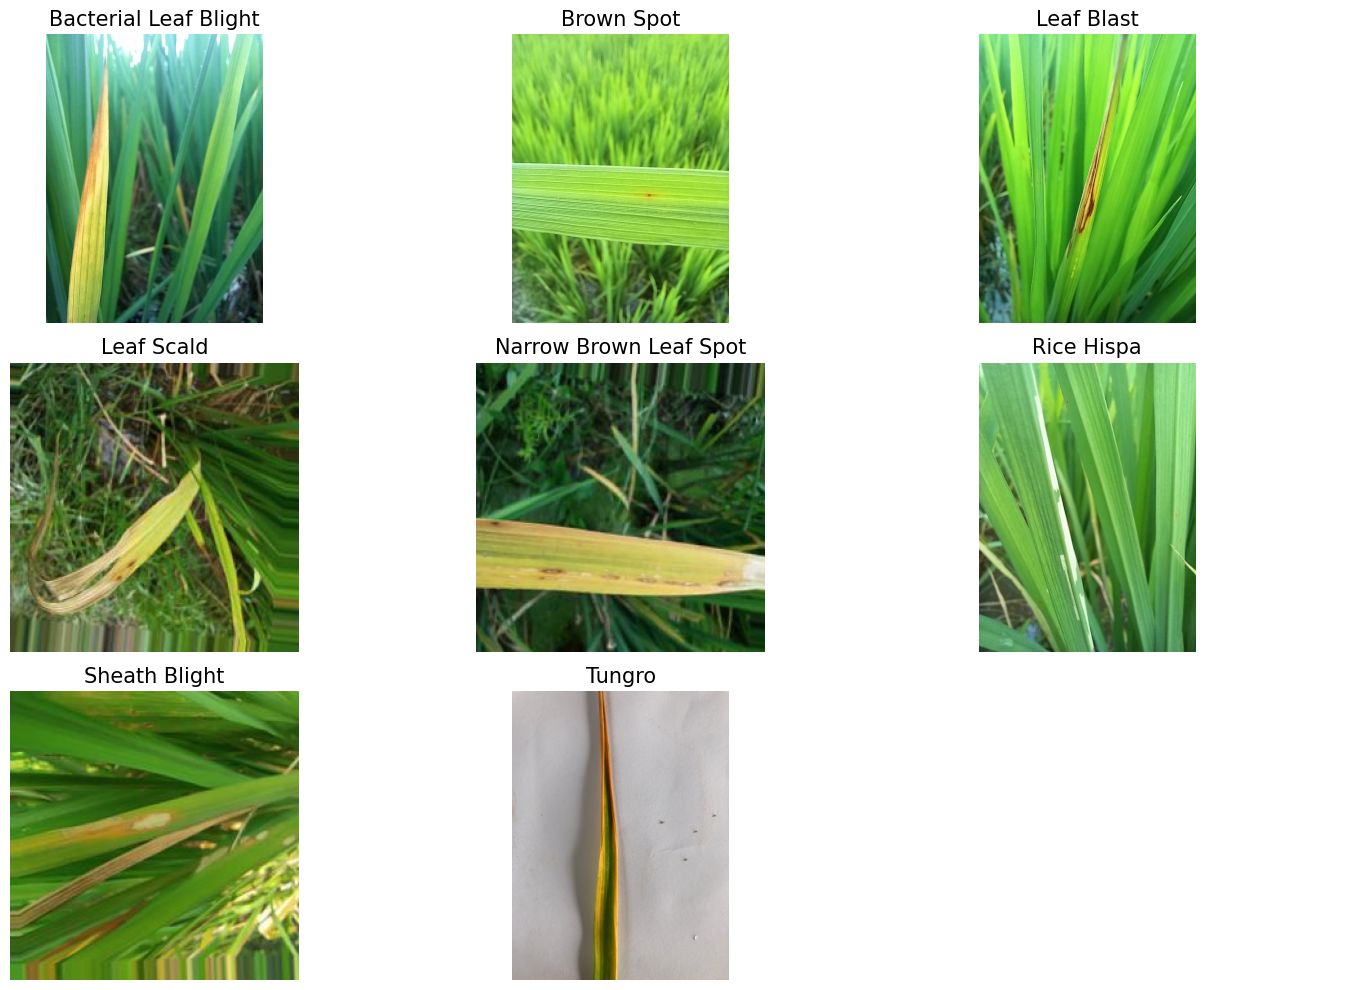

In [22]:
import cv2
import matplotlib.pyplot as plt
import os

# Define the directories
BacterialLeafBlight = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Bacterial Leaf Blight")
BrownSpot = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Brown Spot")
LeafBlast = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Leaf Blast")
Leafscald = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Leaf scald")
NarrowBrownLeafSpot = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Narrow Brown Leaf Spot")
RiceHispa = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Rice Hispa")
ShealthBlight = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Sheath Blight")
Tungro = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\tungro")
NeckBlast = os.listdir(r"G:\My Drive\Rice_Leaf_AUG\Neck_Blast")

# List of directories and corresponding titles
directories = [
    (BacterialLeafBlight, 'Bacterial Leaf Blight'),
    (BrownSpot, 'Brown Spot'),
    (LeafBlast, 'Leaf Blast'),
    (Leafscald, 'Leaf Scald'),
    (NarrowBrownLeafSpot, 'Narrow Brown Leaf Spot'),
    (RiceHispa, 'Rice Hispa'),
    (ShealthBlight, 'Sheath Blight'),
    (Tungro, 'Tungro'),
    (NeckBlast, 'Neck Blast')
]

# Create the figure with a specific canvas size
plt.figure(figsize=(15, 10), facecolor='white')  # Set canvas size

# Loop through the directories and plot one image from each
for i, (img_list, title) in enumerate(directories):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns for 9 images
    
    # Check if the directory is not empty and select the first image
    if img_list:
        img_path = os.path.join(r"G:\My Drive\Rice_Leaf_AUG", title, img_list[0])  # Use the first image in each class
        
        # Read the image
        img = cv2.imread(img_path)
        
        # Check if the image was loaded correctly
        if img is not None:
            # Convert the image from BGR to RGB because OpenCV reads in BGR format
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            # Display the image
            plt.imshow(img_rgb)
            plt.title(title, fontsize=15)  # Title as class name
            plt.axis('off')  # Hide the axis for a cleaner display
        else:
            print(f"Error loading image from {img_path}. Skipping this image.")
            plt.axis('off')  # If there's an error, hide the axis and move to the next plot
    else:
        print(f"No images found in directory: {title}. Skipping this directory.")
        plt.axis('off')  # If no images, skip the subplot and hide the axis

# Adjust layout to ensure the images do not overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load InceptionV3 with pre-trained ImageNet weights
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to prevent updating during initial training
base_model.trainable = False

# Build the custom model on top of InceptionV3
model = Sequential([
    base_model,  # Pre-trained InceptionV3
    GlobalAveragePooling2D(),  # Pooling layer
    Dense(1024, activation='relu'),  # Dense layer with 1024 neurons
    Dropout(0.5),  # Dropout to avoid overfitting
    Dense(10, activation='softmax')  # Assuming you have 5 classes of rice diseases (adjust the number of classes accordingly)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,911,210 (91.21 MB)

 Trainable params: 2,108,426 (8.04 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [23]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


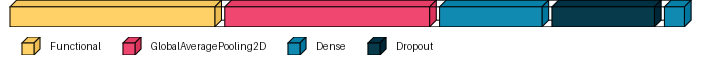

<Figure size 1500x1000 with 0 Axes>

In [25]:
plt.figure(figsize=(15,10),facecolor="white")
import visualkeras
visualkeras.layered_view(model,legend=True)

In [ ]:
# Fit the model
history = model.fit(
    train_generator,  # Training data generator
    epochs=30,        # Number of epochs
    validation_data=val_generator,  # Validation data generator
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Steps per epoch
    validation_steps=val_generator.samples // val_generator.batch_size,  # Validation steps
    # callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]  # Early stopping
)


Epoch 1/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 129s 371ms/step - accuracy: 0.9627 - loss: 0.1435 - val_accuracy: 0.9004 - val_loss: 0.3194
Epoch 2/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2162
Epoch 3/30


c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


346/346 ━━━━━━━━━━━━━━━━━━━━ 147s 424ms/step - accuracy: 0.9682 - loss: 0.1297 - val_accuracy: 0.9041 - val_loss: 0.2941
Epoch 4/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.5240
Epoch 5/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 193s 554ms/step - accuracy: 0.9732 - loss: 0.1185 - val_accuracy: 0.9092 - val_loss: 0.2861
Epoch 6/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.8143
Epoch 7/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 175s 500ms/step - accuracy: 0.9740 - loss: 0.1102 - val_accuracy: 0.9121 - val_loss: 0.2740
Epoch 8/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0629
Epoch 9/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 136s 391ms/step - accuracy: 0.9785 - loss: 0.1001 - val_accuracy: 0.9026 - val_loss: 0.2852
Epoch 10/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")

1384/1384 ━━━━━━━━━━━━━━━━━━━━ 46s 33ms/step - accuracy: 0.9211 - loss: 0.2394
Test accuracy: 0.91


In [20]:
model.save(r'G:\My Drive\inceptionv3_91.h5')

In [8]:
from tensorflow.keras.optimizers import Adam
model.trainable=True

# Re-compile the model after unfreezing layers
model.compile(optimizer=Adam(learning_rate=0.00001),  # Lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Continue training (fine-tuning)
history_fine_tune = model.fit(
    train_generator,
    epochs=10,  # Set the number of epochs
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size,
    # callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,911,210 (91.21 MB)

 Trainable params: 23,876,778 (91.08 MB)

 Non-trainable params: 34,432 (134.50 KB)

Epoch 1/10


c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


346/346 ━━━━━━━━━━━━━━━━━━━━ 1547s 4s/step - accuracy: 0.9873 - loss: 0.0449 - val_accuracy: 0.9542 - val_loss: 0.1433
Epoch 2/10


c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0103
Epoch 3/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 1241s 4s/step - accuracy: 0.9914 - loss: 0.0316 - val_accuracy: 0.9680 - val_loss: 0.1265
Epoch 4/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 5/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 1357s 4s/step - accuracy: 0.9925 - loss: 0.0247 - val_accuracy: 0.9644 - val_loss: 0.1251
Epoch 6/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 6.7509e-04
Epoch 7/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 1126s 3s/step - accuracy: 0.9961 - loss: 0.0146 - val_accuracy: 0.9709 - val_loss: 0.1256
Epoch 8/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.2744
Epoch 9/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 1282s 4s/step - accuracy: 0.9960 

In [11]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.2f}")

1384/1384 ━━━━━━━━━━━━━━━━━━━━ 144s 103ms/step - accuracy: 0.9684 - loss: 0.1049
Test accuracy: 0.97


In [10]:
model.save(r'G:\My Drive\inceptionv3_97.h5')

In [9]:
from tensorflow.keras.models import load_model
model=load_model(r'G:\My Drive\final_models\inceptionv3_97.h5')

Total steps (batches to process): 1384
   7/1384 ━━━━━━━━━━━━━━━━━━━━ 36s 26ms/step - accuracy: 1.0000 - loss: 1.6177e-04

c:\Users\CSEGPUs-03\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1384/1384 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - accuracy: 0.9684 - loss: 0.1049
Test Loss: 0.11205371469259262
Test Accuracy: 0.9696531891822815
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━

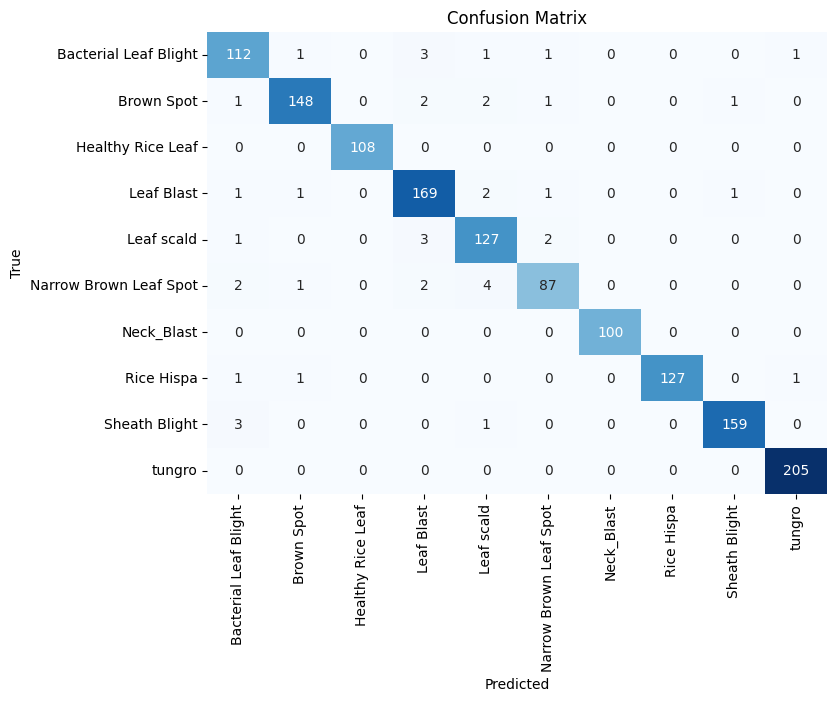

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have these from your trained model
# test_generator: A generator that yields batches of data (X, y)
# model: Your trained Keras/TensorFlow model

# Calculate number of steps based on the number of test images and batch size
steps = np.ceil(test_generator.samples / test_generator.batch_size).astype(int)
print(f"Total steps (batches to process): {steps}")

# Step 1: Evaluate the model on the test generator (optional, if you need to see loss/accuracy)
score = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1]}")

# Step 2: Predict the labels on the entire test dataset from the test generator
y_true = []
y_pred = []

# Loop over the test generator and collect the results
for i, (X_batch, y_batch) in enumerate(test_generator):
    y_batch_pred = model.predict(X_batch)  # Get predictions for the batch
    
    y_true.extend(np.argmax(y_batch, axis=1))  # True labels
    y_pred.extend(np.argmax(y_batch_pred, axis=1))  # Predicted labels
    
    # Stop once we have reached the defined number of steps
    if i + 1 >= steps:
        break  # Exit after processing the desired number of batches

# Convert lists to arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 3: Generate the Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Step 4: Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


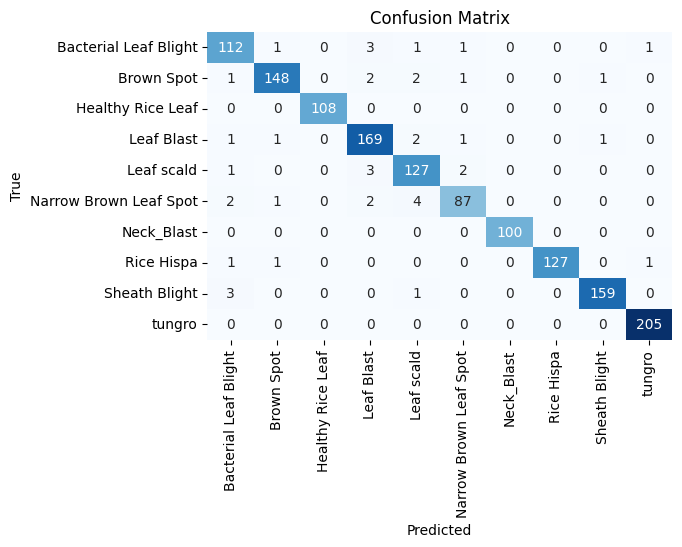

In [18]:
# Step 4: Plot the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import  classification_report
from sklearn.metrics import f1_score, precision_score, recall_score

In [13]:
precision = precision_score(y_true, y_pred, average='macro')  # Change to 'micro', 'macro', or 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Precision: 0.9694
Recall: 0.9675
F1-Score: 0.9684


In [14]:
print("Classification Report:")
print(classification_report(y_true, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       119
           1       0.97      0.95      0.96       155
           2       1.00      1.00      1.00       108
           3       0.94      0.97      0.95       175
           4       0.93      0.95      0.94       133
           5       0.95      0.91      0.93        96
           6       1.00      1.00      1.00       100
           7       1.00      0.98      0.99       130
           8       0.99      0.98      0.98       163
           9       0.99      1.00      1.00       205

    accuracy                           0.97      1384
   macro avg       0.97      0.97      0.97      1384
weighted avg       0.97      0.97      0.97      1384



In [ ]:
y_prob = model.predict(test_generator, verbose=1)

1384/1384 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step


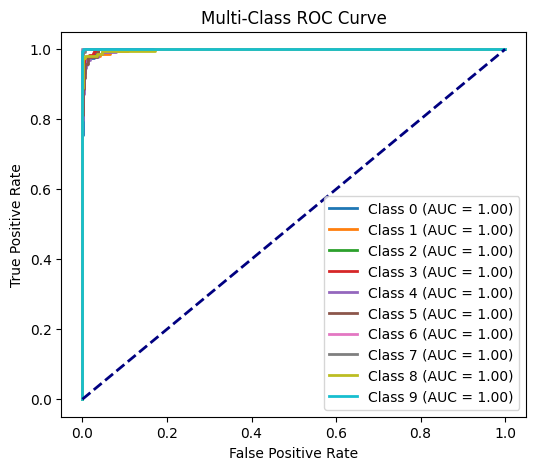

In [19]:
if y_prob.shape[1] > 2:  # Multi-class classification
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(y_prob.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_true == i, y_prob[:, i])  # Binarize for each class
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(6, 5))
    for i in range(len(roc_auc)):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


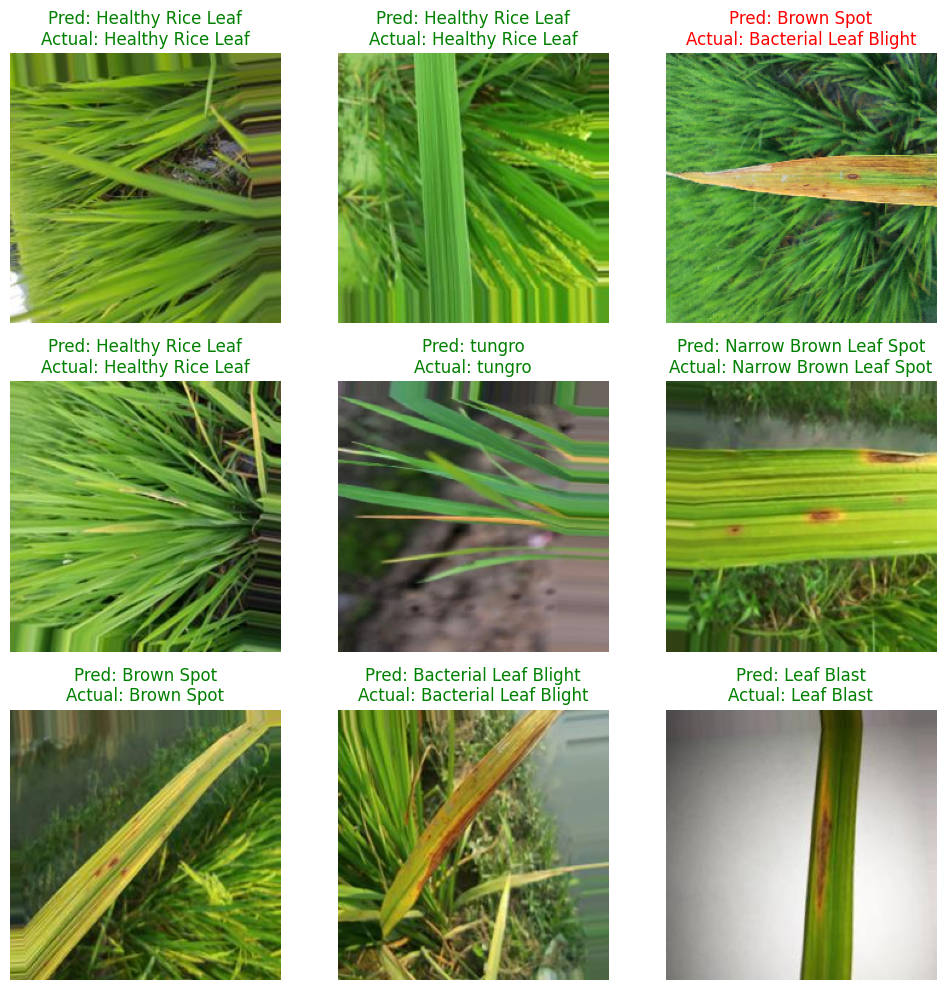

In [17]:
filenames = test_generator.filenames
classes = test_generator.classes
labels = list(test_generator.class_indices.keys())

random_indices = random.sample(range(len(filenames)), 9)
images = []
actual_labels = []
predicted_labels = []

for idx in random_indices:
    img, label = test_generator[idx]
    images.append(img[0])
    actual_labels.append(classes[idx])
    pred = model.predict(img)
    predicted_labels.append(np.argmax(pred))

plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    actual_class = labels[actual_labels[i]]
    predicted_class = labels[predicted_labels[i]]
    color = 'green' if actual_class == predicted_class else 'red'
    plt.title(f"Pred: {predicted_class}\nActual: {actual_class}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
pip install gradio

In [21]:
import gradio as gr
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model(r'G:\My Drive\final_models\inceptionv3_97.h5')

def predict_rice_disease(img):
    # Preprocess the image to the correct format for the model
    img = img.resize((224, 224))  # Assuming the model expects 224x224 images
    img_array = np.array(img) / 255.0  # Normalize if needed
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions, axis=-1)[0]  # Get the index of the predicted class
    
    # Map the predicted class index to the disease name (modify according to your class names)
    class_names = ['Bacterial Leaf Blight', 'Brown Spot', 'Healthy Rice Leaf', 'Leaf Blast', 'Leaf scald', 'Narrow Brown Leaf Spot', 'Neck_Blast', 'Rice Hispa', 'Sheath Blight', 'tungro'] # Example class names
    return class_names[class_idx]
# Create Gradio interface
interface = gr.Interface(
    fn=predict_rice_disease,  # The function to call for predictions
    inputs=gr.Image(type="pil"),  # Input is an image in PIL format
    outputs=gr.Textbox(),  # Output is a text label showing the disease name
    title="Rice Disease Detection",  # Title of the interface
    description="Upload an image of a rice leaf to detect its disease.",  # Description of the app
)

# Launch the interface
interface.launch()


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
